In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

/opt/conda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Normalized Discounted Cumulative Gain (NDCG) 

In the following cell, we write a function to get Normalized Discounted Cumulative Gain Score position k

In [2]:
def get_ndcg(y_true, prediction, rel, k):
    """Discounted cumulative gain (DCG) at rank k
    Parameters
    ----------
    y_true : array-like, shape = [n_samples]
        Ground truth (true relevance labels).
        
    ranking : array-like, shape = [k]
    
    rel: array-like, the graded relevance of the result at position i (arbitrary)
    
    k : int
        Rank.
        
    Returns
    -------
    DCG @k : float
    """
    y_true = np.asarray(y_true)
    ranking = np.asarray(prediction)
    max_rel = sorted(rel, reverse=True)
    
    dcg = 0
    for i in range(0,k):
        
        gains = 2 ** rel[i] - 1
        discounts = np.log2(i + 2)
        dcg += gains/discounts # get DCG

    length = len( prediction)
    idcg = 0
    for i in range (0,k):
        gains = 2 ** max_rel[i] - 1
        discounts = np.log2(i + 2)
        idcg += gains/discounts # get IDCG

    NDCG = dcg/idcg  
    
    return NDCG 

Setting parameters- y_true, prediction and rel

In [39]:
y_true = []
prediction = []
rel = []
for i in range(1,21):
    y_true.append(i)
    rel.append(random.randrange(0,7,1))
    
for i in  random.sample(range(1,21),20):
         prediction.append(i)

In [40]:
y_true

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [41]:
prediction

[7, 4, 12, 1, 11, 17, 18, 14, 2, 5, 15, 10, 20, 16, 6, 9, 3, 13, 8, 19]

In [42]:
rel 

[6, 0, 3, 1, 2, 2, 6, 0, 0, 3, 2, 4, 5, 6, 1, 6, 1, 4, 6, 5]

Now we can get the NDCG ranking score at k th position, here we take 2 and 20 as illustration

In [43]:
get_ndcg(y_true, prediction, rel, 2)

0.61314719276545837

In [44]:
get_ndcg(y_true, prediction, rel, 20)

0.72681782324307942

# Plot for NDCG


In [45]:
ndcg= []
for i in range(1,21):
    ndcg.append(get_ndcg(y_true, prediction, rel, i))

/opt/conda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


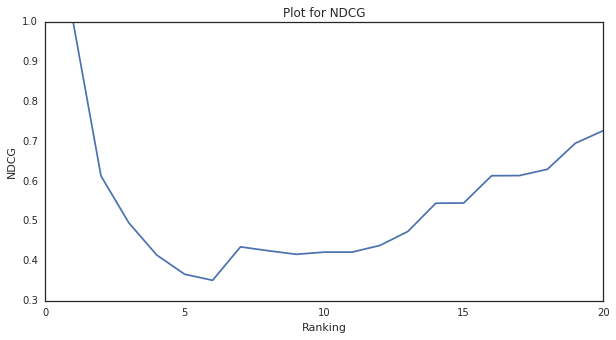

In [46]:
# Make plots
fig, ax = plt.subplots(figsize = (10, 5))
sns.set(style="white")

plt.plot(range(1,21),ndcg)
    
# Set title and labes
plt.title("Plot for NDCG")
plt.ylabel("NDCG")
plt.xlabel("Ranking")